## Run Brownian dynamics in the Schutte potential
We use the 6-well one-dimensional potential introduced by Schutte and his co-workers ([*JCP* 2011](https://doi.org/10.1063/1.3590108))

In [1]:
import h5py
import numpy as np
import itertools
from scipy.stats import norm
import time

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [3]:
import sys
sys.path.append("..")
from smfsmodels import schutte

In [4]:
xvals = np.linspace(-1.9,9.9,num=1000)

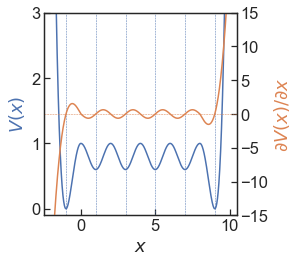

In [6]:
fig, ax = plt.subplots(figsize=(4.5,4))
fplot = [schutte.f(y) for y in xvals]
ax.plot(xvals, fplot)
#fplot = [3*schutte.f(y) for y in x]
#ax.plot(x, fplot, 'C2')

axt = ax.twinx()
dfplot = [schutte.df(y) for y in xvals]
axt.plot(xvals, dfplot, color='C1')
[ax.axvline(i, 0, 1, lw=0.5, ls='--') \
     for i in range(-1, 11, 2)]
axt.axhline(0, -1, 11, color='C1', lw=0.5, ls='--')
ax.set_ylim(-0.1, 3)
axt.set_ylim(-15,15)
ax.set_ylabel('$V(x)$', color='C0')
axt.set_ylabel('$\partial V(x)/\partial x$', color='C1')
ax.set_xlabel('$x$')
plt.tight_layout(h_pad=0)

In [7]:
def schutte_runner(inp):
    np.random.seed()
    numsteps = inp[0]
    x = inp[1]
    dt = inp[2]

    tt, xk = schutte.run_brownian(x0=x, dt=dt, \
                    numsteps=numsteps, fwrite=10)
    data = np.column_stack((tt,xk))

    h5file = "data/schutte_num%g_dt%g_fwrite10.h5"%(numsteps, dt)
    print (h5file)
    with h5py.File(h5file, "w") as hf:
        hf.create_dataset("data", data=data)
    return h5file, tt, xk

In [40]:
h5file, t, x = schutte_runner([5e8, -1., 1e-4])

data/schutte_num5e+08_dt0.0001_fwrite10.h5


In [41]:
file = h5py.File(h5file, 'r')
data = np.array(file['data'])
file.close()

<ipython-input-42-78b0c2d5aa9c>:5: RuntimeWarning: divide by zero encountered in log
  ax.plot(bc, -np.log(h), label='-ln(P(x))', lw=2)


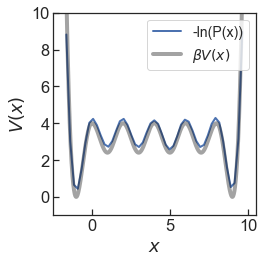

In [42]:
fig, ax = plt.subplots(figsize=(4,4))

h, be = np.histogram(x, bins=np.linspace(-2,10,50), density=True)
bc = [0.5*(be[i] + be[i+1]) for i in range(len(be)-1)]
ax.plot(bc, -np.log(h), label='-ln(P(x))', lw=2)

ax.plot(xvals, [4*x for x in fplot], '-', color='k', \
        label=r'$\beta V(x)$', lw=4, alpha=0.4)

ax.set_ylabel('$V(x)$')
ax.set_xlabel('$x$')
ax.set_ylim(-1,10)
ax.legend(loc=1, fontsize=14)

plt.tight_layout()

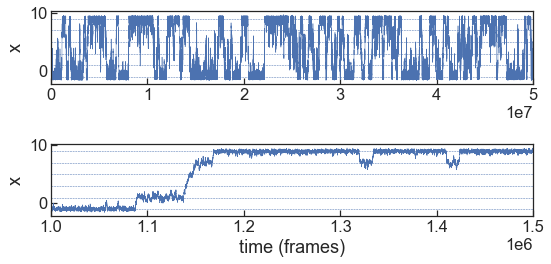

In [43]:
fig, ax = plt.subplots(2,figsize=(8,4), sharey=True)
#fplot = [f(y) for y in x]
ax[0].plot(x, lw=0.5)
ax[1].plot(x, lw=0.5)
ax[0].set_xlim(0,len(x))
ax[1].set_xlim(10e5,15e5)
[[ax[j].axhline(i, 0, 1, lw=0.5, ls='--') \
  for i in range(-1, 11, 2)] for j in range(2)]
ax[0].set_ylabel('x')
ax[1].set_ylabel('x')
ax[1].set_xlabel('time (frames)')

plt.tight_layout()